
### Line Plots

[Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

**Update: 10/17** $\rightarrow$ Not going to use tidy data format, since 

1. I don't know how to calculate mean and standard error from a tidy dataset
2. Realized seaborn isn't really great at visualizing 12 lines in a graph


Going to use matplotlib to allow for maximal customization



**Actually!, going to store it in a tidy dataset and THEN manipulate it again (based on port location) to get dates as index and box number as separate columns**


**Update: 11/15** $\rightarrow$ changed iloc to loc 


1. Realized that when calculating averages and sem, it was doing it by position! 
2. Normally this wouldn't matter but the computer can't "naturally sort" 
3. Thus the box numbers were arranged as such: 
> 1, 10, 2, 3, 4, 5, 6, 7, 8, 9 

4. This ordering made the adult average to be (1, 10, 2, 3, 4) and adol average to be (5, 6, 7, 8, 9) 

5. Therefore, changed iloc (index location) to loc (string location)!! 




In [1]:

import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
from matplotlib.dates import DateFormatter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
pd.set_option('display.max_columns', 500)

import matplotlib.style as style 

# style.available
style.use('seaborn-bright')


In [2]:
# pd.read_csv(filepath, delimiter='')

In [52]:
# file = "pokes_iti_window_23hr.csv"

In [53]:
# filepath = "metric_data/23_hr/Nov_14/" + file

In [55]:
# filepath

In [29]:
def metric_to_tidy(filepath):
    """
    returns a tidy version of the metric
    """
    
    metric = pd.read_csv(filepath, header=[0,1], index_col=0, dtype='object') 

    # Passsing in headers as a list of ints will make it a MultiIndex --> Multilevel dataframe
    # index_col (As ints) sets the index_column
    # use dtype='object' to preserve data as stored in Excel

    stacked = metric.stack("Box Number")   # Stack Box Numbers (make it into a column)
    s_ = stacked.reset_index()             # reset index to make it into a single level dataframe
    s_.columns.name = ""                   # null string for column name

    s_.rename(columns={'level_0': "date", "Box Number": "Box_Number"}, inplace=True)
    
    # # Melt Operation
    melt = pd.melt(s_, id_vars=['date', 'Box_Number'], var_name='Location', value_name='Frequency')

    
    melt.Frequency = pd.to_numeric(melt.Frequency)

    tidy = melt.copy()
    tidy['date'] = "2019/" + melt['date'].str[:5]    # Add in year here! since year defaults to 1900
    tidy['code'] = melt['date'].str[-2:]
    tidy['date'] =  pd.to_datetime(tidy['date'], format="%Y/%m/%d")
    
    return tidy
    

In [30]:
# metric = pd.read_excel(filepath, header=[0,1], index_col=0, dtype='object') 
# # metric.head()

In [31]:
# stacked = metric.stack("Box Number")
# stacked
# s_ = stacked.reset_index()
# s_.columns.name = "" 
# s_.rename(columns={'level_0': "date", "Box Number": "Box_Number"}, inplace=True)

In [32]:
# s_.head()

In [33]:
# melt = pd.melt(s_, id_vars=['date', 'Box_Number'], var_name='Location', value_name='Frequency')
# melt.head()

**USING ILOC (OUTPUTS INCORRECT VALUE!!!)**

In [34]:
# def tidy_to_plot_format(loc_df, column_name="Frequency"):
#     """
#     loc_df = can be left/middle/right/total (usually will be total)
#     """
#     pivot = loc_df.pivot(index="date", columns='Box_Number', values=column_name)
    
#     pivot["Adult Avg"] = pivot.iloc[:, :5].mean(axis=1)  # average over first 5 
#     pivot['Adol Avg'] = pivot.iloc[:, 5:10].mean(axis=1) # average over next 5
#     pivot['Adult Sem'] = pivot.iloc[:, :5].sem(axis=1, ddof=1)
#     pivot['Adol Sem'] = pivot.iloc[:, 5:10].sem(axis=1, ddof=1)
    
#     return pivot

**USING .LOC (CORRECT VALUE!!!)**

In [35]:
def tidy_to_plot_format(loc_df, column_name="Frequency"):
    """
    loc_df = can be left/middle/right/total (usually will be total)
    """
    pivot = loc_df.pivot(index="date", columns='Box_Number', values=column_name)
    
    pivot["Adult Avg"] = pivot.loc[:, ['1','2','3','4','5']].mean(axis=1)  # average over first 5 
    pivot['Adol Avg'] = pivot.loc[:, ['6','7','8','9','10']].mean(axis=1) # average over next 5
    pivot['Adult Sem'] = pivot.loc[:, ['1','2','3','4','5']].sem(axis=1, ddof=1)
    pivot['Adol Sem'] = pivot.loc[:, ['6','7','8','9','10']].sem(axis=1, ddof=1)
    
    return pivot

In [327]:
file = "trials_initiated.csv"

In [328]:
filepath = "metric_data/dark_cycle/Nov_14/" + file

In [329]:
filepath

'metric_data/dark_cycle/Nov_14/trials_initiated.csv'

#### Output Tidy data format from excel file

In [330]:
# tidy = metric_to_tidy(filepath)
tidy = metric_to_tidy(filepath)
# tidy.head(40)

In [331]:
# tidy.head()

In [332]:
melt = pd.melt(tidy, id_vars=['date', 'Box_Number'], var_name='Location', value_name='Frequency')

In [333]:
# melt.head()

#### Parsing Out by (Total / Left / Middle / Right)  -- make it into a function later

In [334]:
total = tidy[tidy.Location=="Total"]
total.head(2)

,date,Box_Number,Location,Frequency,code
1560,2019-09-23,1,Total,63,71
1561,2019-09-23,10,Total,157,71


#### Reshaping tidy data into plotting format (Innput for the graphs!!) 

In [335]:
total_plot = tidy_to_plot_format(total)
total_plot.tail(2)

Box_Number,1,10,2,3,4,5,6,7,8,9,Adult Avg,Adol Avg,Adult Sem,Adol Sem
date,,,,,,,,,,,,,,
2019-11-12,126,19,242,277,286,261,222,106,76,170,238.4,118.6,29.080234,35.515630
2019-11-13,78,41,169,230,192,180,140,65,51,216,169.8,102.6,25.148360,33.263494


### Code Dictionary!! Very Important!! 

In [336]:
code_dict = {"delay_window":"Pokes during the Delay Window", "iti_window": "Pokes during the ITI Window", "paradigm_total": "Total Nosepokes", 
             "trial_window":"Incorrect pokes before Trial Initiation", "incorrect": "Total Number of Invalid Trials", "initiated" : "Total Number of Initiated Trials", "omission":"Total Number of Omission Trials",  
              "reward": "Total Number of Rewards", "reward_tir": "Total Number of Rewards (TIR)", "delay_window_23hr":"Pokes during the Delay Window (23 hours)", "iti_window_23hr": "Pokes during the ITI Window (23 hours)", "paradigm_total_23hr": "Total Nosepokes (23 hours)", 
             "trial_window_23hr":"Incorrect pokes before Trial Initiation (23 hours)", "incorrect_23hr": "Total Number of Invalid Trials (23 hours)", "initiated_23hr" : "Total Number of Initiated Trials (23 hours)", "omission_23hr":"Total Number of Omission Trials (23 hours)",  
              "reward_23hr": "Total Number of Rewards (23 hours)", "reward_tir_23hr": "Total Number of Rewards (TIR) (23 hours)",  }

len(code_dict)

18

#### Get the title for the graph from file name

In [337]:
def get_graph_title(file):

    title_list = file.split(".")[0].split("_")[1:]    # truncate the last part (by splitting with '.' and then split it by underscore)
                                                      # (dropping the first and last word from title)
    title_key = '_'.join(title_list)  # Make the string from the list

    title = code_dict[title_key]
    
    return title
    

In [338]:
a_ = get_graph_title(file)
a_

'Total Number of Initiated Trials'

### Plotting Function

**Arguments:**  
1. plot_df: dataframe to plot  
2. paradigms: list or tuple (dates of new paradigm starts)  
3. save_fig: boolean (save graph or show graph   


In [339]:
for i in range(6,11):
    print(i)


6
7
8
9
10


In [340]:
def plot_metrics(plot_df, paradigms=None, save_fig=False):

    title = get_graph_title(file)
    
    # # Start Plotting
    fig, ax = plt.subplots(figsize=(12,9))

    # range(1,5)
    for i in range(1,6):
        box_number = str(i)   # 
        ax.plot(plot_df[box_number], c='red', alpha = 0.15)

    for j in range(6,11):
        box_number = str(j)
        ax.plot(plot_df[box_number], c='blue', alpha = 0.15)

    ax.errorbar(x=plot_df.index, y=plot_df["Adult Avg"], yerr=plot_df['Adult Sem'], c='red', alpha=0.9)
    ax.errorbar(x=plot_df.index, y=plot_df["Adol Avg"], yerr=plot_df['Adol Sem'], c='blue', alpha=0.9)


    ax.legend(['755', '756', '757', '758', '762', '792', '793', '794', '797', '798', "Adult Avg", "Adol Avg"], loc='upper center', bbox_to_anchor=(1.1, 1.02))

    ax.set_title(title, fontdict={"fontsize":16})
    # ax.set_xlabel("Days")
    ax.set_ylabel("Counts", fontdict={"fontsize":14})

    plt.xticks(plot_df.index, plot_df.index)  # (location, labels)

    myFmt = DateFormatter("%m-%d")                  # set the date format (ex: 10/17)
    ax.xaxis.set_major_formatter(myFmt)         
    fig.autofmt_xdate(rotation=70, ha='center')

    
    # # Creating Paradigm Cutoff Dates

    if paradigms is not None:
        if not isinstance(paradigms, (list,tuple)):
            raise TypeError("Only lists or tuples are accepted as 'paradigms' parameter")
        
        
        elif not all(isinstance(elem, str) for elem in paradigms):   # If all the elements of list, array are string
            raise ValueError("All dates in 'paradigms' must be in strings in datetime format (YYYY-MM-DD)")
        
        else:   # should check for datetime formats too?? --> looks like pandas does it for me
            paradigm_position = []
            for i in paradigms:
                dt = pd.to_datetime(i)
                paradigm_position.append(dt)
                
            # # plot dates of paradigms (vertical lines)
            for p in paradigm_position:
                ax.axvline(x=p, color='k', linestyle='--', dashes=(3, 5), linewidth=2, alpha=0.5)



    if save_fig:
        plt.tight_layout()
        plt.savefig(title) # filename
    else: 
        plt.show()



In [341]:
dates_total = ['2019-09-18','2019-09-19','2019-09-22','2019-10-6','2019-10-9','2019-10-17','2019-10-22','2019-10-25','2019-10-28','2019-11-07','2019-11-10','2019-11-11'] 
dates_tir = ['2019-10-6','2019-10-9','2019-10-17','2019-10-22','2019-10-25','2019-10-28','2019-11-07','2019-11-10','2019-11-11']
dates_tir2 = ['2019-10-9','2019-10-17','2019-10-22','2019-10-25','2019-10-28','2019-11-07','2019-11-10','2019-11-11']
dates_tir3 = ['2019-10-17','2019-10-22','2019-10-25','2019-10-28','2019-11-07','2019-11-10','2019-11-11']

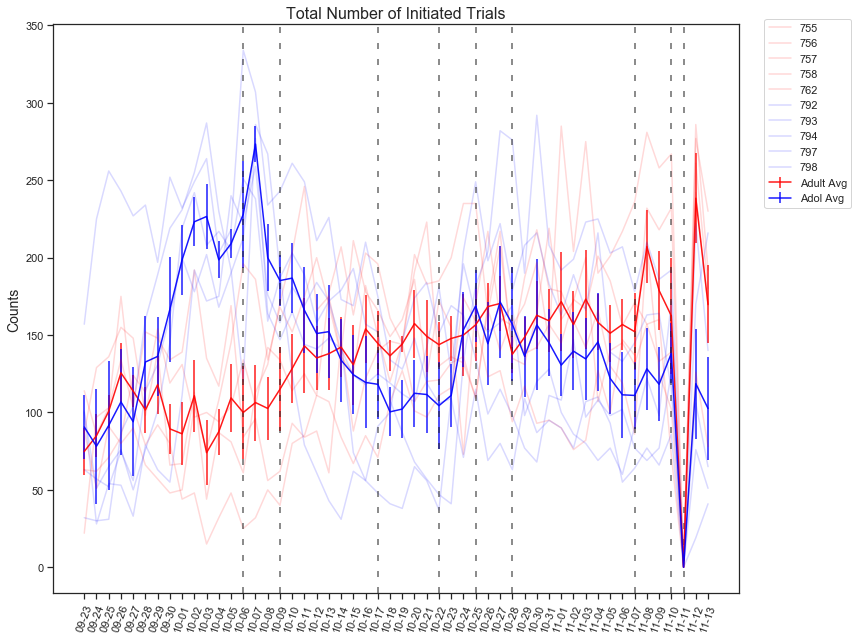

In [342]:
plot_metrics(total_plot, paradigms=dates_tir, save_fig=True)

[Matplotlib Linestyles - Docs](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html) (Dashed Lines etc.)  

[Plotting Multiple Vertical Lines (for datetime)](https://stackoverflow.com/questions/19213789/how-do-you-plot-a-vertical-line-on-a-time-series-plot-in-pandas/35902487)

### Formatters and Converters Issue (Matplotlib vs. Pandas)
- unrelated to plotting since it's a warning that goes away after one iteration, BUT, leaving it here as documentation in case it's raised again and I need to troubleshoot it. 

[Explanation of the Warning](https://github.com/facebook/prophet/issues/999)  

[Another Explanation of Pandas - Matplotlib Converters](https://nextjournal.com/blog/plotting-pandas-prophet)

[Matplotlib Converters Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.register_matplotlib_converters.html)


In conclusion, just follow the warning sign and add/change as necessary! 

____

### Date Formatter!! 

[How to format dates x-axis ticks - StackOverflow](https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels-in-matplotlib) (Using DateFormatter)  

[Example of plt.xticks(location, labels, rotation)](https://stackoverflow.com/questions/32572419/matplotlib-not-showing-all-x-axis-data-frame-variable) (As used above in the graph)


____
### Other IMPT References

#### Different Error Types - Important!! 
1. [ValueError vs. TypeError](https://stackoverflow.com/questions/48343387/valueerror-and-typeerror-in-python)


#### Type() vs isinstance()! Also Important!! 
1. [type() vs. isinstance()](https://stackoverflow.com/questions/1549801/what-are-the-differences-between-type-and-isinstance)

#### Checking if all items in a list are string types
1. [How to check if all items in list are strings](https://stackoverflow.com/questions/37357798/how-to-check-if-all-items-in-list-are-string)

2. [Check if objects is a list of strings - using basestring](https://stackoverflow.com/questions/18495098/python-check-if-an-object-is-a-list-of-strings)*

*Oops Nevermind! Basestring removed from Python 3*:
[Python Docs](https://docs.python.org/3.0/whatsnew/3.0.html#text-vs-data-instead-of-unicode-vs-8-bit)
